In [1]:
IMAGE_PATH = '/home/nazir/Desktop/projects/bts-img-seg/dataset/imgs/'
MASK_PATH = '/home/nazir/Desktop/projects/bts-img-seg/dataset/masks/'

In [2]:
import skimage
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

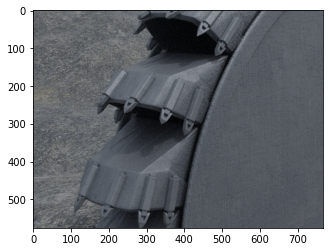

In [89]:
image=skimage.io.imread(IMAGE_PATH+'Image0001.jpg')
target=skimage.io.imread(MASK_PATH+'Image0001.png')
target = skimage.color.rgb2gray(target)
gray = skimage.color.rgb2gray(image)
blurred = skimage.filters.gaussian(gray, sigma=0.1)
fig, ax = plt.subplots()
plt.imshow(image,cmap='gray')
plt.show()

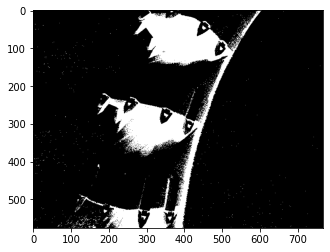

In [90]:
t = skimage.filters.threshold_otsu(blurred)
binary_mask = (blurred < t)
fig, ax = plt.subplots()
plt.imshow(binary_mask, cmap='gray')
plt.show()

#Edge based segmentations

In [91]:
from skimage.feature import canny
edges = canny(binary_mask)
edges.sum()

15435

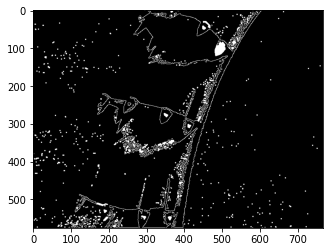

In [92]:
from scipy import ndimage as ndi
fill_teeth = ndi.binary_fill_holes(edges)
fig, ax = plt.subplots()
plt.imshow(fill_teeth, cmap='gray')
plt.show()

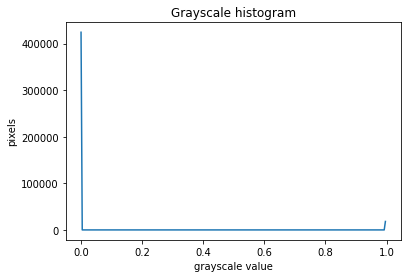

In [93]:
histogram, bin_edges = np.histogram(fill_teeth, bins=256, range=(0.0, 1.0))

plt.plot(bin_edges[0:-1], histogram)
plt.title('Grayscale histogram')
plt.xlabel('grayscale value')
plt.ylabel('pixels')
# plt.xlim(0.0, 1.0)
plt.show()

In [94]:
def dice_metric(inputs, target):
    intersection = 2.0 * (target * inputs).sum()
    union = target.sum() + inputs.sum()
    if target.sum() == 0 and inputs.sum() == 0:
        return 1.0

    return intersection / union

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


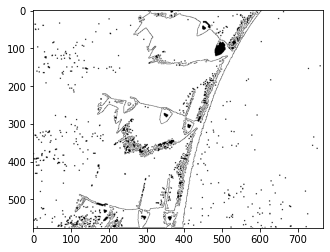

0.001953125
(576, 768)


In [95]:
t = skimage.filters.threshold_otsu(fill_teeth)
binary_mask = (fill_teeth < t)
fig, ax = plt.subplots()
plt.imshow(binary_mask, cmap='gray')
plt.show()
print(t)
print(binary_mask.shape)

In [96]:
dice_metric(binary_mask, target)

0.03764089689291822

#Region based segmentation

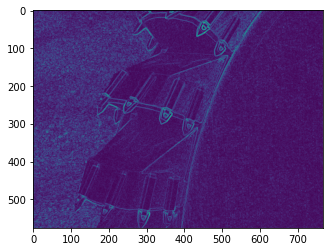

In [102]:
from skimage.filters import sobel
elevation_map = sobel(gray)
fig, ax = plt.subplots()
plt.imshow(elevation_map*10)
plt.show()

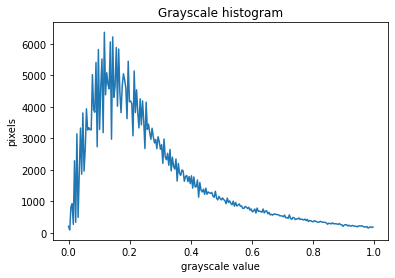

In [103]:
histogram, bin_edges = np.histogram(elevation_map*10, bins=256, range=(0.0, 1.0))

plt.plot(bin_edges[0:-1], histogram)
plt.title('Grayscale histogram')
plt.xlabel('grayscale value')
plt.ylabel('pixels')
# plt.xlim(0.0, 1.0)
plt.show()

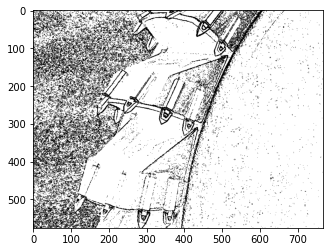

0.47804769304298717
(576, 768)


In [109]:
t = skimage.filters.threshold_otsu(elevation_map*10)
binary_mask = (elevation_map*10 < 0.5)
fig, ax = plt.subplots()
plt.imshow(binary_mask, cmap='gray')
plt.show()
print(t)
print(binary_mask.shape)

In [110]:
from skimage.segmentation import watershed
markers = np.zeros_like(image)
markers[image < 1] = 1
markers[image > 1] = 2
segmentation = watershed(elevation_map, markers)
fig, ax = plt.subplots()
plt.imshow(segmentation,cmap='gray')
plt.show()

ValueError: operands could not be broadcast together with shapes (576,768,3) (576,768) 